In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os

d:\projects\gpb\.venv\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


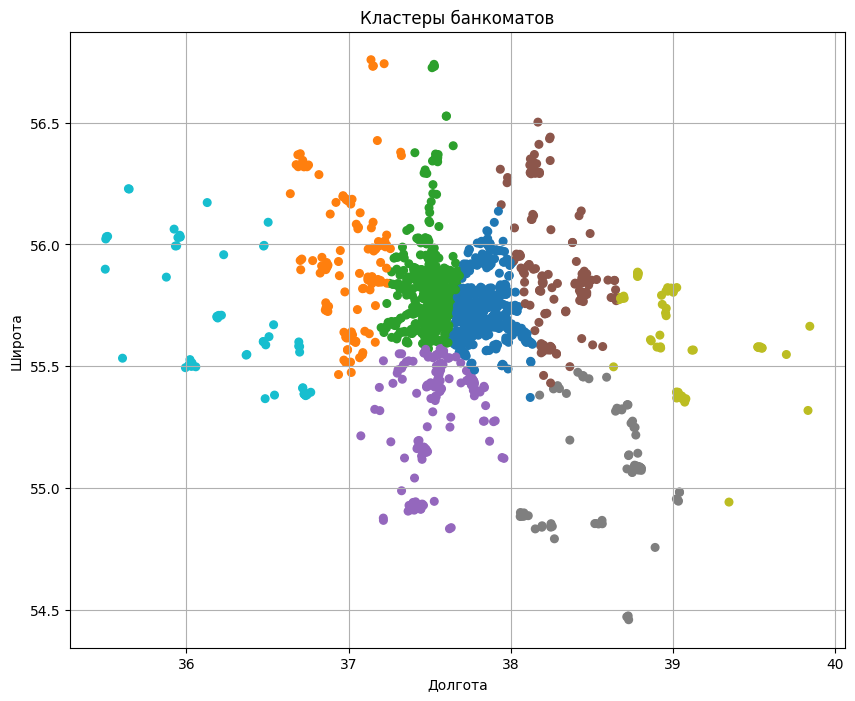

In [ ]:
# 2. Загрузка данных
# Путь к данным
os.chdir('D:/projects/gpb')


# Чтение файлов
df_locations = pd.read_excel('data/gpb_adm_data.xlsx', sheet_name=0)


# 3. Выбираем только координаты
X = df_locations[['longitude', 'latitude']]

# 4. Обучаем KMeans
n_clusters = 8 # сколько хочешь кластеров
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_locations['cluster'] = kmeans.fit_predict(X)

# 5. Визуализация
plt.figure(figsize=(10, 8))
plt.scatter(df_locations['longitude'], df_locations['latitude'], c=df_locations['cluster'], cmap='tab10', s=30)
plt.title('Кластеры банкоматов')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.grid(True)
plt.show()

In [19]:
import folium
from folium.plugins import MarkerCluster

# Предположим, у нас уже есть кластеризация
# df_locations с колонками: ['TID', 'longitude', 'latitude', 'cluster']

# 2. Создаем базовую карту (центрируем на Москву)
moscow_center = [55.751244, 37.618423]
m = folium.Map(location=moscow_center, zoom_start=11)

# 3. Создаем группы маркеров
marker_cluster = MarkerCluster().add_to(m)

# 4. Добавляем банкоматы на карту
for idx, row in df_locations.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"TID: {row['TID']}, Cluster: {row['cluster']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# 5. Показываем карту
m

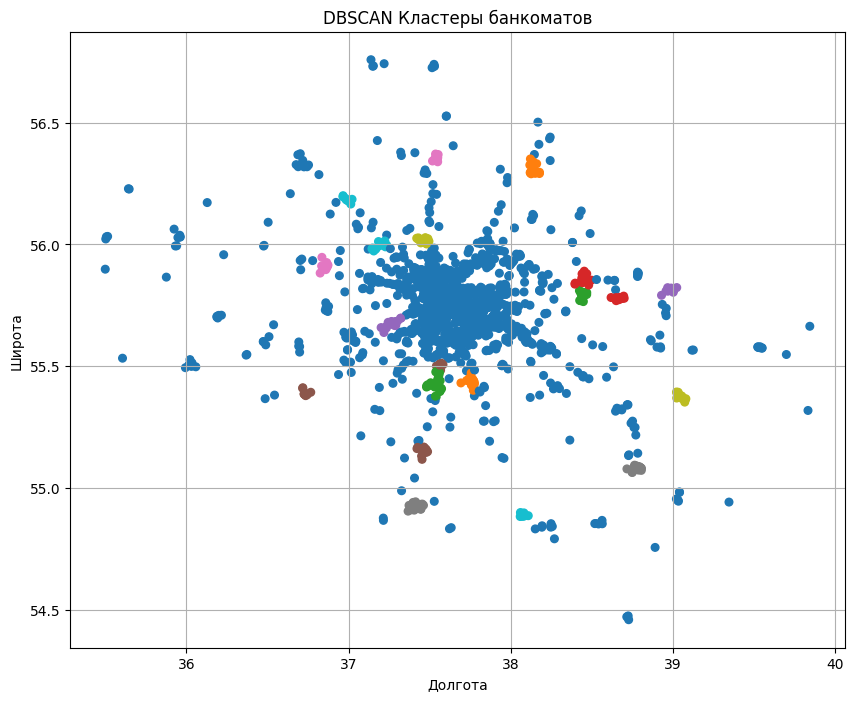

In [18]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Стандартизация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Обучаем DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=10)
df_locations['cluster_dbscan'] = dbscan.fit_predict(X_scaled)

# Визуализация
plt.figure(figsize=(10, 8))
plt.scatter(df_locations['longitude'], df_locations['latitude'], c=df_locations['cluster_dbscan'], cmap='tab10', s=30)
plt.title('DBSCAN Кластеры банкоматов')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.grid(True)
plt.show()

### Кластеризация TimeSeries

In [26]:
df_incomes = pd.read_excel('data/gpb_adm_data.xlsx', sheet_name=1)
# 2. Убираем столбец 'TID', так как он не используется для кластеризации
X = df_incomes.drop(columns='TID').values

# 3. Нормализация данных
scaler = TimeSeriesScalerMeanVariance()  # Нормализация данных
X_scaled = scaler.fit_transform(X)

# 4. Применение TimeSeriesKMeans для кластеризации
# Задаем количество кластеров (например, 3)
n_clusters = 3

model = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", verbose=True)
y_pred = model.fit_predict(X_scaled)

# 5. Добавляем кластерные метки в данные
df_incomes['Cluster'] = y_pred

# 6. Выводим результаты
print(df_incomes[['TID', 'Cluster']])

d:\projects\gpb\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\projects\gpb\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\projects\gpb\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\projects\gpb\.venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


154.307 --> 84.178 --> 83.518 --> 83.297 --> 83.210 --> 83.184 --> 83.172 --> 83.167 --> 83.163 --> 83.162 --> 83.162 --> 83.161 --> 83.160 --> 83.158 --> 83.158 --> 83.158 --> 
         TID  Cluster
0     406136        2
1     406139        2
2     406145        2
3     406148        2
4     406180        0
...      ...      ...
1625  699578        0
1626  699579        0
1627  699629        1
1628  699641        2
1629  699664        2

[1630 rows x 2 columns]


In [29]:
df_incomes.head(2)

TID  2022-09-01 00:00:00  2022-09-02 00:00:00  2022-09-03 00:00:00  \
0  406136                90000               105000                99000   
1  406139               103000               206000               168000   

   2022-09-04 00:00:00  2022-09-05 00:00:00  2022-09-06 00:00:00  \
0               107000               110000                60000   
1               124000                78000               165000   

   2022-09-07 00:00:00  2022-09-08 00:00:00  2022-09-09 00:00:00  ...  \
0                75000                89000                95000  ...   
1               164000               174000                88000  ...   

   2022-11-22 00:00:00  2022-11-23 00:00:00  2022-11-24 00:00:00  \
0                78000                    0               165000   
1               153000               151000               157000   

   2022-11-25 00:00:00  2022-11-26 00:00:00  2022-11-27 00:00:00  \
0                    0               189000               106000   
1               206000               182000               123000   

   2022-11-28 00:00:00  2022-11-29 00:00:00  2022-11-30 00:00:00  Cluster  
0                94000                75000                74000        2  
1               138000               112000               179000        2  

[2 rows x 93 columns]

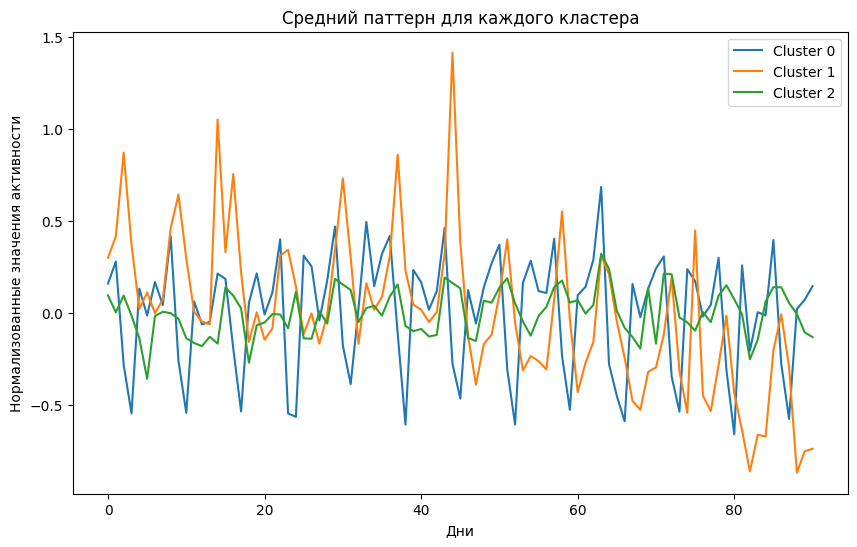

Размеры кластеров: [515 460 655]
Средний коэффициент силуэта: 0.031


C:\Users\r9634\AppData\Local\Temp\ipykernel_6092\2379518757.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_incomes, x='Cluster', palette='Set2')


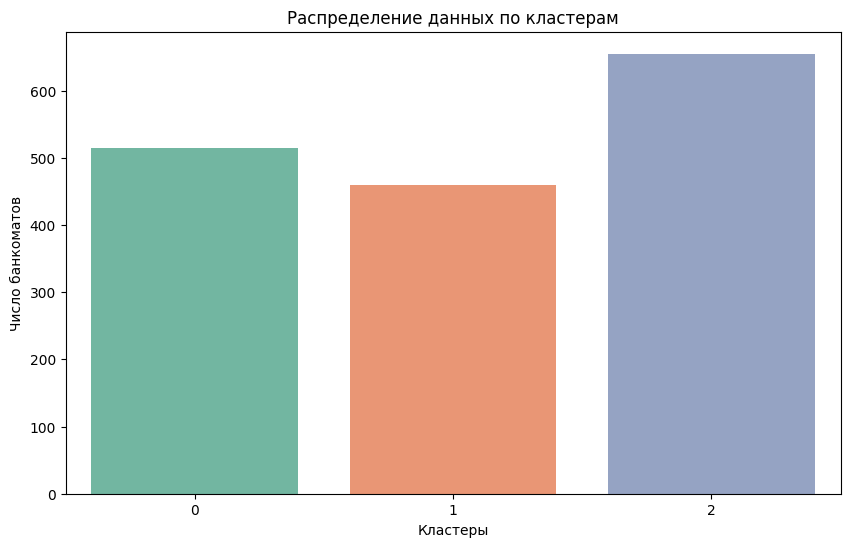

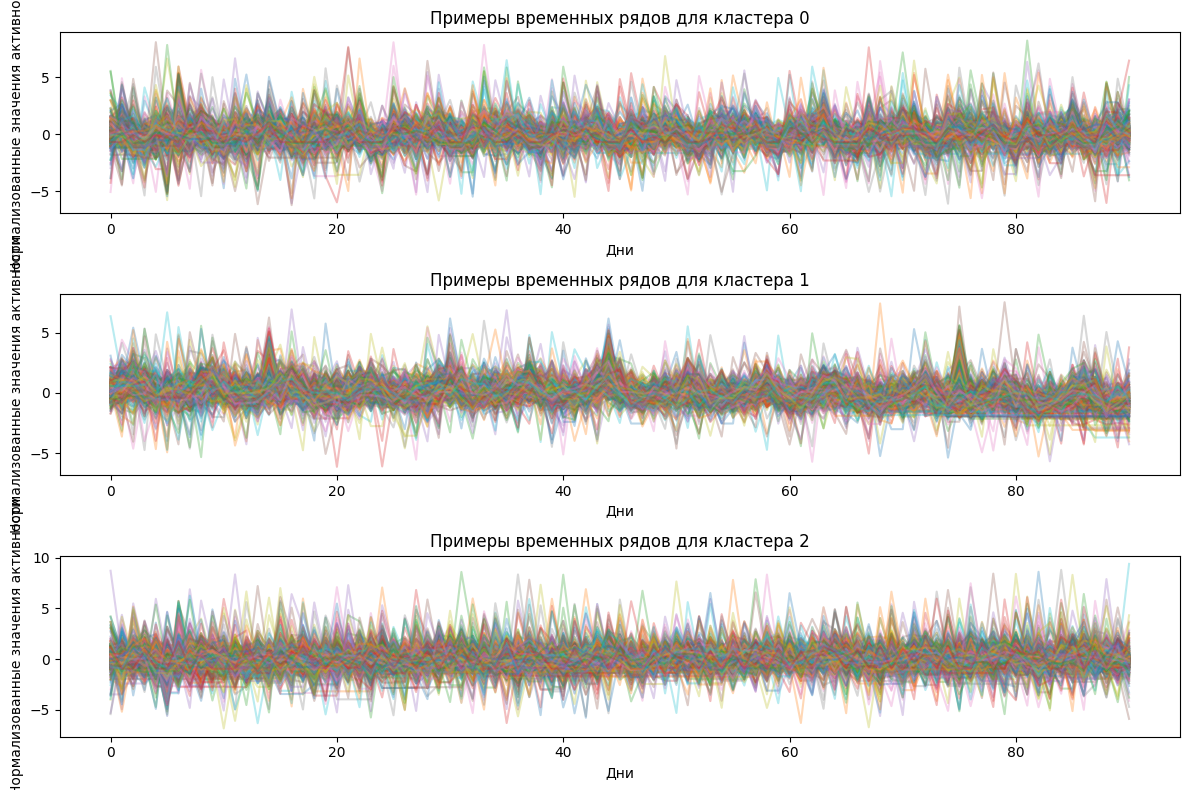

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import silhouette_score

# 1. Анализ среднего паттерна для каждого кластера
# Для этого будем рассчитывать средний временной ряд по каждому кластеру
avg_patterns = np.array([X_scaled[y_pred == i].mean(axis=0) for i in range(n_clusters)])

# Визуализируем средний паттерн для каждого кластера
plt.figure(figsize=(10, 6))
for i in range(n_clusters):
    plt.plot(avg_patterns[i], label=f'Cluster {i}')
plt.title('Средний паттерн для каждого кластера')
plt.xlabel('Дни')
plt.ylabel('Нормализованные значения активности')
plt.legend()
plt.show()

# 2. Анализ размеров кластеров
cluster_sizes = np.bincount(y_pred)
print(f"Размеры кластеров: {cluster_sizes}")

# 3. Оценка качества кластеризации с помощью силуэта
silhouette_avg = silhouette_score(X_scaled.reshape(X_scaled.shape[0], -1), y_pred)
print(f"Средний коэффициент силуэта: {silhouette_avg:.3f}")

# 4. Визуализация распределения по кластерам
df_incomes['Cluster'] = y_pred
plt.figure(figsize=(10, 6))
sns.countplot(data=df_incomes, x='Cluster', palette='Set2')
plt.title('Распределение данных по кластерам')
plt.xlabel('Кластеры')
plt.ylabel('Число банкоматов')
plt.show()

# 5. Дополнительная визуализация примеров банкоматов из каждого кластера
plt.figure(figsize=(12, 8))
for i in range(n_clusters):
    plt.subplot(n_clusters, 1, i+1)
    cluster_data = X_scaled[y_pred == i]
    for series in cluster_data:
        plt.plot(series, alpha=0.3)  # Показать несколько рядов
    plt.title(f'Примеры временных рядов для кластера {i}')
    plt.xlabel('Дни')
    plt.ylabel('Нормализованные значения активности')

plt.tight_layout()
plt.show()
